In [1]:
import numpy as np
import pandas as pd
from pygam import LinearGAM, s
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [6]:
np.random.seed(1)
data = pd.read_csv("C://Users//arjun//Downloads//airQuality.csv")
data['Ozone'] = np.cbrt(data['Ozone'])
data = data.dropna()
X = data[['Solar.R', 'Wind', 'Temp', 'Month', 'Day']]
Y = data['Ozone']

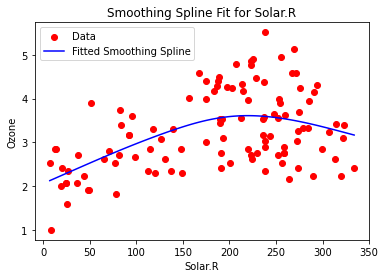

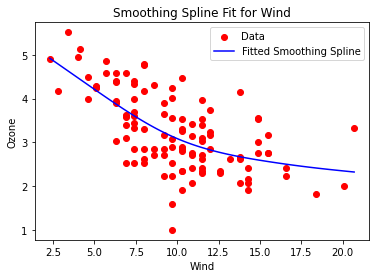

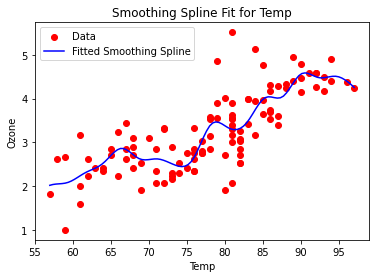

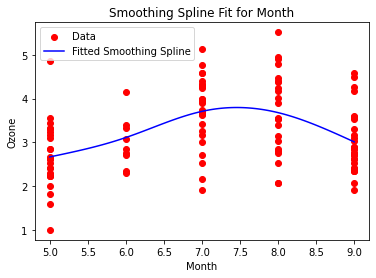

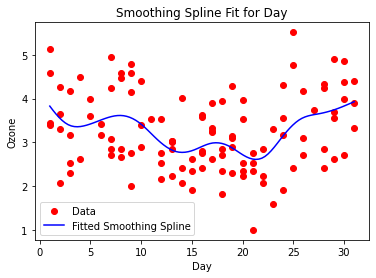

Predictor: Solar.R
Regularization parameter: 278.2559402207126
Degrees of freedom: 3.159605174475877 

Predictor: Wind
Regularization parameter: 278.2559402207126
Degrees of freedom: 3.0096447385191047 

Predictor: Temp
Regularization parameter: 0.03593813663804628
Degrees of freedom: 14.840030595892552 

Predictor: Month
Regularization parameter: 46.41588833612782
Degrees of freedom: 3.999421915333012 

Predictor: Day
Regularization parameter: 1.291549665014884
Degrees of freedom: 8.632075809852346 



In [25]:
lam_range = np.logspace(-3, 4, 10)
cv_lam = []
cv_df = []
kf = KFold(n_splits=5)

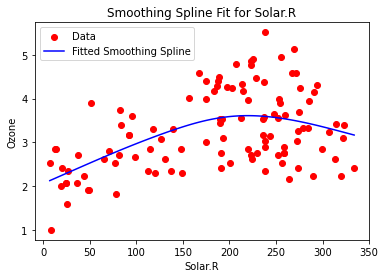

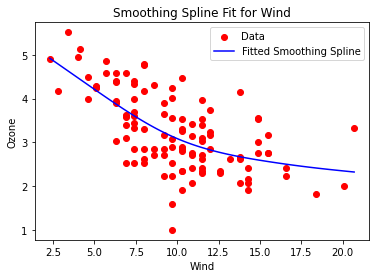

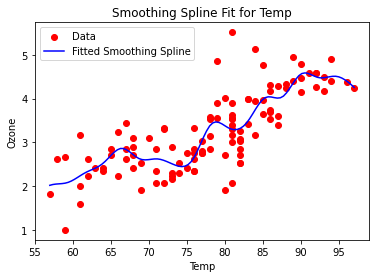

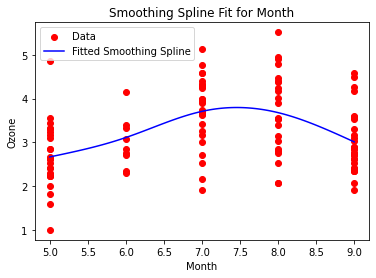

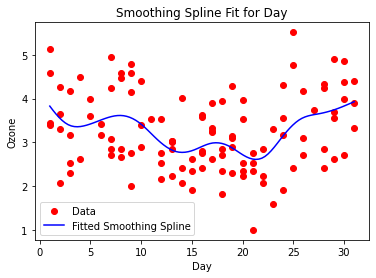

In [26]:
for col in X.columns:
    rss = []
    df = []
    for reg in lam_range:
        cv_rss = []
        cv_dff = []
        for i_train, i_val in kf.split(X):
            train_X, val_X = X.iloc[i_train], X.iloc[i_val]
            train_Y, val_Y = Y.iloc[i_train], Y.iloc[i_val]
            gam = LinearGAM(s(0, lam = reg))
            gam.fit(train_X[col].values.reshape((-1, 1)), train_Y)
            val_Y_pred = gam.predict(val_X[col].values.reshape((-1, 1)))
            cv_rss.append(np.mean((val_Y - val_Y_pred)**2))
            cv_dff.append(gam.statistics_['edof'])
        rss.append(np.mean(cv_rss))
        df.append(np.mean(cv_dff))
    opt_reg = lam_range[np.argmin(rss)]
    cv_lam.append(opt_reg)
    cv_df.append(df[np.argmin(rss)])
    gam = LinearGAM(s(0, lam = opt_reg))
    gam.fit(X[col].values.reshape((-1, 1)), Y)
    X_plot = np.linspace(X[col].min(), X[col].max(), 100)
    Y_plot = gam.predict(X_plot.reshape((-1, 1)))
    plt.scatter(X[col], Y, c = 'red', label = 'Data')
    plt.plot(X_plot, Y_plot, color = 'blue', label = 'Fitted Smoothing Spline')
    plt.xlabel(col)
    plt.ylabel('Ozone')
    plt.legend()
    plt.title(f'Smoothing Spline Fit for {col}')
    plt.show()

In [27]:
for i in range(len(X.columns)):
    print(f"Predictor: {X.columns[i]}")
    print(f"Regularization parameter: {cv_lam[i]}")
    print(f"Degrees of freedom: {cv_df[i]}", "\n")

Predictor: Solar.R
Regularization parameter: 278.2559402207126
Degrees of freedom: 3.159605174475877 

Predictor: Wind
Regularization parameter: 278.2559402207126
Degrees of freedom: 3.0096447385191047 

Predictor: Temp
Regularization parameter: 0.03593813663804628
Degrees of freedom: 14.840030595892552 

Predictor: Month
Regularization parameter: 46.41588833612782
Degrees of freedom: 3.999421915333012 

Predictor: Day
Regularization parameter: 1.291549665014884
Degrees of freedom: 8.632075809852346 



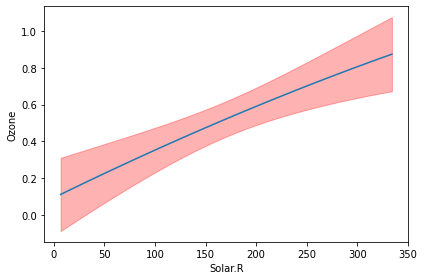

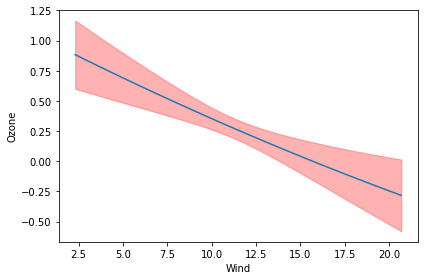

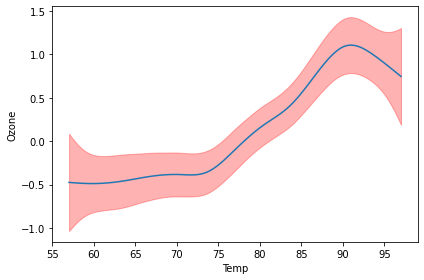

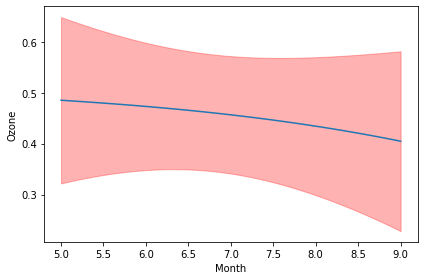

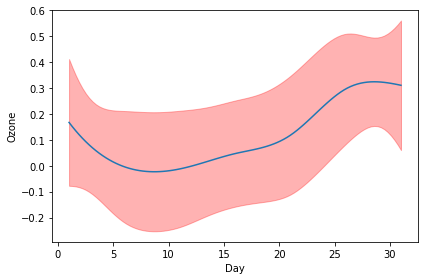

In [38]:
Solar_df = 4
Wind_df = 4
Temp_df = 15
Month_df = 4
Day_df = 9

gam_fit = LinearGAM(
s(0, n_splines=Solar_df) +
s(1, n_splines=Wind_df) +
s(2, n_splines=Temp_df) +
s(3, n_splines=Month_df) +
s(4, n_splines=Day_df), fit_intercept=True)

gam_fit.fit(X, Y)

for i in range(1, 6):
     X_gen = gam_fit.generate_X_grid(term=i-1)
     partial_dep, confidence_intervals = gam_model.partial_dependence(term=i-1,X=X_gen, width=0.95)
     plt.plot(X_gen[:, i-1], partial_dep)
     plt.fill_between(X_gen[:, i-1], confidence_intervals[:, 0], confidence_intervals[:, 1], color='red', alpha=0.3)
     plt.xlabel(data.columns[i+1])
     plt.ylabel("Ozone")
     plt.tight_layout()
     plt.show()

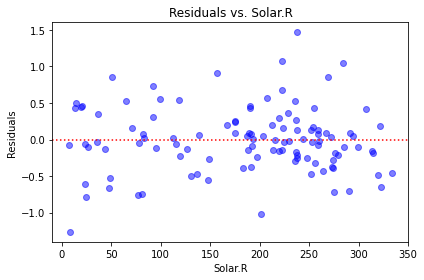

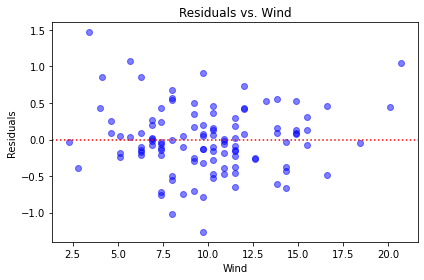

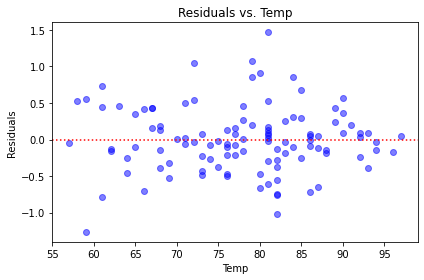

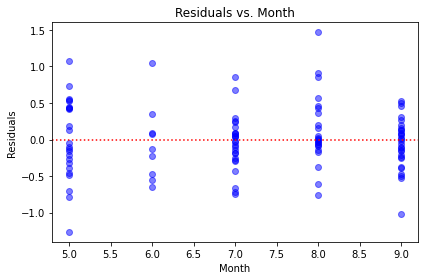

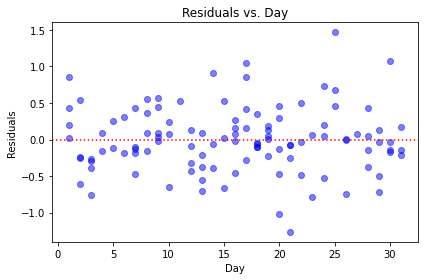

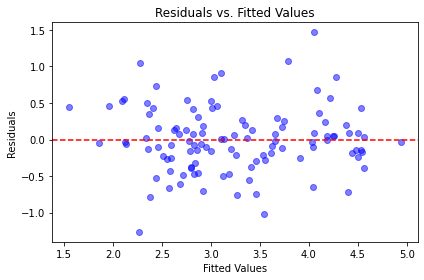

In [17]:
residuals = Y - gam_model.predict(X)
for i, predictor in enumerate(["Solar.R", "Wind", "Temp", "Month", "Day"]):
     plt.scatter(data[predictor], residuals, facecolor="blue", alpha=0.5)
     plt.xlabel(predictor)
     plt.ylabel("Residuals")
     plt.title(f"Residuals vs. {predictor}")
     plt.axhline(0, color="red", linestyle=":")
     plt.tight_layout()
     plt.show()
plt.scatter(gam_model.predict(X), residuals, facecolor="blue", alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.axhline(0, color="red", linestyle="--")
plt.tight_layout()
plt.show()